## Assignment - A3.part2
### Devin Hall, Tyler Birnie
### Due: 3-25-22 @ 11:59pm
Some pre-requisites we will need for this project

In [125]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.preprocessing
import sklearn.decomposition

### Question 1: Pokemon Data
Load in the data, look at the distribution of Pokemon skills (data features) we will use for dimenionality reduction. "HP, Attack, Defense, SpAtk, SpDef, and Speed"

In [126]:
pData = pd.read_csv("Pokemon.csv") #read in entire Pokemon.csv file
pData.head(10)

,Num,Name,Type1,Type2,Total,HP,Attack,Defense,SpAtk,SpDef,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


#### Question 1A:
create a violin plot showing the distribution of these variables
Helpful functions: python- seaborn package; violinplot


In [127]:
import warnings    #notebook generated depreciation errors for future updates
                    #removed warnings for just this instance

with warnings.catch_warnings(record=True):
    pData.Name = pData.Name.str.replace(".*(?=Mega)", "") #remove extra name spaces
    pData['Type2'].fillna(pData['Type1'], inplace=True) #replace all non values
    new_data=pData.copy() #make a copy of pData
    new_data.drop(["Num","Total","Generation","Legendary"], 1, inplace=True) #drop columns we are not interested in


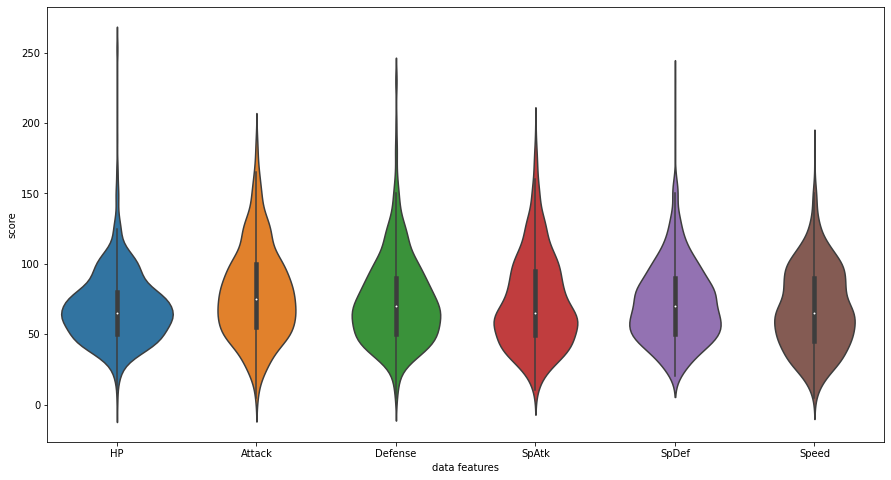

In [128]:
figure = plt.figure(figsize=(15,8))  #create figure size

plt.xlabel('data features')          #xlabel

plt.ylabel('score')                  #ylabel

sns.violinplot(data=new_data)        #violinplot

plt.show()                           #show everything

#### Question 1B: 
The six features (Pokemon Skills) have different ranges, therefore we should scale the data before considering PCA. Standardize the data (center the data- subtract the mean, and divide by the standard deviation). 

_"Note, we only need to scale the data for the 6 variables under consideration"_
Helpful functions: python- StandardScaler from sklearn.preprocessing

In [129]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()

newer_data = new_data.copy()

features = ['HP','Attack','Defense','SpAtk','SpDef','Speed']

#seperate out the features
x = newer_data.loc[:,features].values

#seperate out the target
y = newer_data.loc[:,['Type1']].values

#fit the data
x = scaler.fit_transform(x)

print(x)

[[-0.95062622 -0.92490618 -0.79715364 -0.2391303  -0.24818854 -0.80150318]
 [-0.3628221  -0.5241302  -0.34791742  0.21955954  0.29115635 -0.28501525]
 [ 0.42091674  0.09244823  0.29384863  0.83114599  1.01028289  0.40363531]
 ...
 [ 0.42091674  0.95565803 -0.44418232  2.36011211  2.08897269  0.05931003]
 [ 0.42091674  2.49710411 -0.44418232  2.97169856  2.08897269  0.40363531]
 [ 0.42091674  0.95565803  1.4811158   1.74852566  0.65071962  0.05931003]]


#### Quesetion 1C:
Preform principle components analysis (PCA) on the scaled Pokemon skills data. 
Helpful funcitons: PCA function sklearn.decomposition

In [130]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

principalComponents = pca.fit_transform(x)

principalDf= pd.DataFrame(data = principalComponents, 
                          columns=['principal component 1',
                                   'principal component 2'])

finalDf= pd.concat([principalDf,newer_data[['Type1']]], axis=1)

print(finalDf)

     principal component 1  principal component 2    Type1
0                -1.556375              -0.021482    Grass
1                -0.362867              -0.050269    Grass
2                 1.280152              -0.062720    Grass
3                 2.620916               0.704263    Grass
4                -1.758284              -0.706179     Fire
..                     ...                    ...      ...
795               2.307521               2.303187     Rock
796               3.539772              -0.811013     Rock
797               2.458216              -0.515882  Psychic
798               3.530397              -0.951065  Psychic
799               2.233786               0.537630     Fire

[800 rows x 3 columns]


#### Question 1D:
Plot the transformed data in the space defined by the first two principal components.  

[This should be a scatter plot]
helpful functions: python- matplotlib, scatter

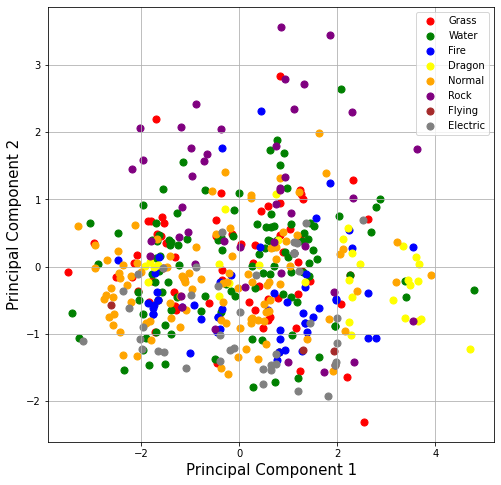

In [131]:
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(1,1,1)

ax.set_xlabel('Principal Component 1', fontsize=15)

ax.set_ylabel('Principal Component 2', fontsize=15)

targets=['Grass','Water','Fire','Dragon','Normal','Rock','Flying','Electric']

colors= ['red','green','blue','yellow','orange','purple','brown','grey']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Type1'] ==target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
              finalDf.loc[indicesToKeep, 'principal component 2'],
               c = color, s = 50)

ax.legend(targets)

ax.grid()

#### Question 1E:
Explore the amount of variance explained by each principle component direction. 
First, plot the proportion of variance explained (y-axis) vs. the different principle components. 
Second, plot the cummulative proportion of variance explained by the principle components. Make sure this plot has y-limits from 0 - 1.
helpful functions: python- matplotlib, scatter or plot

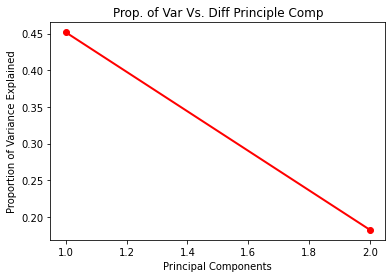

In [132]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Prop. of Var Vs. Diff Principle Comp')
plt.xlabel('Principal Components')
plt.ylabel('Proportion of Variance Explained')
plt.show()

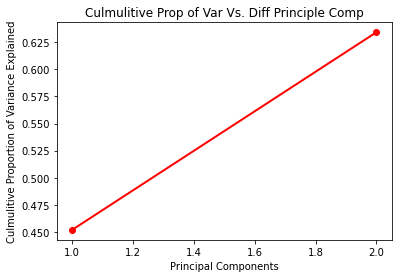

In [133]:
out_sum = np.cumsum(pca.explained_variance_ratio_)  
plt.plot(PC_values, out_sum, 'ro-', linewidth=2)
plt.title('Culmulitive Prop of Var Vs. Diff Principle Comp')
plt.xlabel('Principal Components')
plt.ylabel('Culmulitive Proportion of Variance Explained')
plt.show()

### Question 2: College Data
The set of colleges considered are the 21 top colleges based on earning potential of undergraduates with computer science degrees: "college_data.csv" 
(Sources: 2014- Payscale.com and the National Center for Education Statistics, NCES)

[load the data from college_data.csv]

In [134]:
cData = pd.read_csv("college_data.csv") #read in entire college_data.csv file
cData

,UnitID,Institution Name,ShortHandName,Early Career Pay,Mid-Career Pay,Total price for in-district students living on campus 2015-16 (DRVIC2015),Professors (S2014_SIS_RV With faculty status tenured),Associate professors (S2014_SIS_RV With faculty status tenured),Assistant professors (S2014_SIS_RV With faculty status on tenure track),Average salary equated to 9 months of full-time instructional staff - professors (DRVHR2014_RV),...,Average salary equated to 9 months of full-time instructional staff - assistant professors (DRVHR2014_RV),Percent admitted - men (DRVADM2014_RV),Percent admitted - women (DRVADM2014_RV),Percent admitted - total (DRVADM2014_RV),Full-time retention rate 2014 (EF2014D_RV),Student-to-faculty ratio (EF2014D_RV),Percent of total enrollment that are women (DRVEF2014_RV),Total enrollment (DRVEF2014_RV),Graduation rate total cohort (DRVGR2014_RV),Percent of full-time first-time undergraduates awarded Pell grants (SFA1314_RV)
0,110422,California Polytechnic State University-San Lu...,CalPoly,81200,134000,25414,275,172,142,94230,...,70245,27,35,31,93,22,46,20186,75,13
1,110538,California State University-Chico,CSU-Chico,57700,134000,23496,216,98,80,88164,...,66051,69,73,71,87,26,53,17287,59,42
2,110574,California State University-East Bay,CSUEB,76700,128000,23487,122,94,63,94194,...,70353,67,72,70,81,27,62,14823,38,58
3,211440,Carnegie Mellon University,CMU,100000,125000,65895,362,96,144,154584,...,105525,22,28,25,96,10,38,12587,88,14
4,190150,Columbia University in the City of New York,Columbia,87400,132000,69084,888,184,389,201411,...,113913,8,6,7,96,6,51,27589,95,16
5,190549,CUNY Brooklyn College,CUNY,61200,125000,27737,205,132,111,83979,...,55953,35,36,35,82,14,60,17390,50,58
6,166683,Massachusetts Institute of Technology,MIT,99800,135000,63250,643,116,167,195282,...,113940,6,13,8,99,8,37,11319,91,18
7,171128,Michigan Technological University,MTU,61200,125000,27677,106,123,106,110097,...,76032,75,76,76,85,13,26,7099,64,25
8,180461,Montana State University,MSU,61400,126000,20099,175,143,149,95364,...,67779,80,87,84,76,19,46,14982,50,27
9,193900,New York University,NYU,78100,132000,68400,1027,481,334,194553,...,109584,37,35,35,92,10,55,49274,83,23


#### Question 2A:
Preform principal component analysis on the college data (make sure to preprare the data in any way needed)
Helpful functions: python- PCA from sklearn.decomposition

In [135]:
features = ['Early Career Pay','Mid-Career Pay'] #fetures we care about

#seperate out the features
x2 = cData.loc[:,features].values

#seperate out the target
y2 = cData.loc[:,['ShortHandName']].values

#fit the data
x2 = scaler.fit_transform(x2)

#PCA of 2 components
pca2 = PCA(n_components = 2)

#transform data
princComp = pca2.fit_transform(x2)

#create data fram for principal components 1 & 2
princDf= pd.DataFrame(data = princComp, columns=['principal component 1','principal component 2'])

#final dataframe of principal components 1 & 2 with shortHandName
finalDf2= pd.concat([princDf,cData[['ShortHandName']]], axis=1)

print(finalDf2)

    principal component 1  principal component 2 ShortHandName
0                0.171506               0.178595       CalPoly
1               -1.097031              -1.089942     CSU-Chico
2               -0.518034               0.382313         CSUEB
3                0.516392               1.863368           CMU
4                0.357307               0.662149      Columbia
5               -1.578044              -0.231068          CUNY
6                1.249977               1.108191           MIT
7               -1.578044              -0.231068           MTU
8               -1.492809              -0.294710          MSU 
9               -0.144709               0.160132           NYU
10               0.301919              -0.286496  Northwestern
11              -1.443093              -0.096117          SFSU
12               0.769279              -0.116889          SJSU
13               3.690242              -1.364462      Stanford
14               1.414774               0.230854      B

#### Questiton 2B:
Plot the dat in the space defined by the first two principal components (labeling each point with the school it represents)

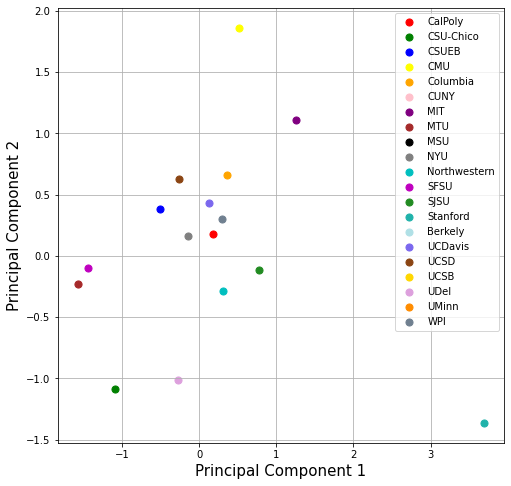

In [136]:
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(1,1,1)

ax.set_xlabel('Principal Component 1', fontsize=15)

ax.set_ylabel('Principal Component 2', fontsize=15)


#shortNames= np.asarray(finalDf2[['ShortHandName']]) #extract short hand names
shortNames=['CalPoly','CSU-Chico','CSUEB','CMU','Columbia','CUNY','MIT','MTU',
           'MSU','NYU','Northwestern','SFSU','SJSU','Stanford','Berkely','UCDavis',
           'UCSD','UCSB','UDel','UMinn','WPI']

#random color assignemtn for all 21 short hand names 
randColors=['red','green','blue','yellow','orange','pink','purple','brown','black','grey',
           'c','m','forestgreen','lightseagreen','powderblue','mediumslateblue','saddlebrown',
           'gold','plum','darkorange','slategray']

#create plot
for tar, col in zip(shortNames,randColors):  
    indicesToKeep = finalDf2['ShortHandName'] == tar
    ax.scatter(finalDf2.loc[indicesToKeep, 'principal component 1'],
              finalDf2.loc[indicesToKeep, 'principal component 2'],
               c = col, s=50)

#show the legends
ax.legend(shortNames)

ax.grid()

#### Quesiton 2C:
Plot the amount of cumulative variance explained.
How many principal components should be used for any further analysis to be done on the data?

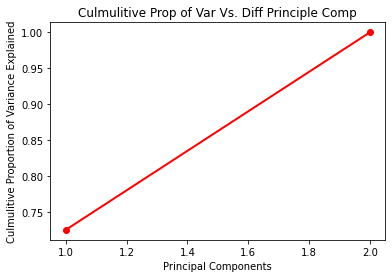

We should be using 2 principal components



In [137]:
#principal component values
PC_values2 = np.arange(pca2.n_components_) + 1

#culmulative variance
out_sum2 = np.cumsum(pca2.explained_variance_ratio_)  

plt.plot(PC_values2, out_sum2, 'ro-', linewidth=2)

plt.title('Culmulitive Prop of Var Vs. Diff Principle Comp')

plt.xlabel('Principal Components')

plt.ylabel('Culmulitive Proportion of Variance Explained')

plt.show()
print("We should be using 2 principal components\n")

### Question 3: Text Classification
For this question you will be considering text classificatoin using two different Naive Bayes models. These approaches will be discussed in class and referenced from the following book.

Manning, C., Raghavan, P., Schutze, H. Introduction to Information Retrieval, Cambridge University Press, 2008
http://nlp.stanford.edu/IR-book/

In particular, look at Chapter 13 http://nlp.stanford.edu/IR-book/html/htmledition/text-classification-and-naive-bayes-1.html

You will be using data from the Presidential State of the Union Addresses available as a zip archive. The speeches are available in text files sorted by year, e.g., a1.txt, ..., a231.txt. The text files are formated such that there is one word per line and most punctuation has been removed. Note, there are still hyphens or dashes left in the text files and there may be some errors in splitting of words.

#### Quesiton 3A:
Load the addresses. You will need to create a vector listing the party affiliation of each president to match their speech, you may use the file "party.txt" to help with this classification.


In [138]:
data_list = []

with open('sotu/party.txt', 'r') as f:
    for line in f.readlines():
        listified = line.split(',')

        # Any garbage in the file will be ignored
        if len(listified) != 3:
            continue

        # Remove any commas or spacing in the elements
        listified = [element.strip().replace(', ', '') for element in listified]

        # A line is like 'n, washington, 1790'
        party, pres, year = listified
        # Extract the data and store in a more friendly list format
        data_list.append([party, pres, year])

# Convert to vector
VEC_PARTY = np.array(data_list)

print(f"Successfully extracted {len(VEC_PARTY)} party affiliations from party.txt")

# Now we need to extract the addresses
with open('sotu/stateoftheunion1790-2017.txt', 'r') as f:
    # Read the entire thing as a string
    all_content = '\n'.join(f.readlines())
    # Split up the file by the triple *
    split_by_ast = all_content.split('***')
    # The first element is table of contents
    table_of_contents = split_by_ast[0]
    split_by_ast.pop(0)
    # The last element is garbage
    del split_by_ast[-1]
    # The last element now marks the end
    del split_by_ast[-1]
    # We should now have all the addresses in lists

VEC_ADDRESSES = np.array(split_by_ast)
# Pretty memory heavy, just to be safe
del split_by_ast

# Extra processing, remove punctuation we don't care about and excessive white space
for i, string in enumerate(VEC_ADDRESSES):
    clean = ' '.join(string.split())
    clean = clean.replace(':', '')
    clean = clean.replace(',', '')
    clean = clean.replace('-', '')
    clean = clean.replace('(', '')
    clean = clean.replace(')', '')
    clean = clean.replace('.', '')
    clean = clean.lower()
    VEC_ADDRESSES[i] = clean

print(f"Succesfully parsed {len(VEC_ADDRESSES)} addresses")

Successfully extracted 231 party affiliations from party.txt
Succesfully parsed 231 addresses


#### Question 3B:
Remove _stopwords_ from consideration for the method. The stopwords are availabe at "stopwords.txt" or found in various packages nltk and 'tm.

In [139]:
STOPWORDS = []
with open('sotu/stopwords.txt', 'r') as f:
    for line in f.readlines():
        STOPWORDS.append(line.strip().lower())

print(f"Successfully loaded {len(STOPWORDS)} stopwords")
print("Starting stopword removal, this may take a few sec...")

words_removed = 0
# Now that we have stop words, remove them from our addresses
for i, pres_address in enumerate(VEC_ADDRESSES):

    # make a list of words
    curr_address = pres_address.split(' ')
    # A new construction of the address where words that are valid are added
    new_address = []
    # Loop through all the words
    for word in curr_address:

        # If the word is just white space then we don't care
        if len(word) <= 0:
            continue

        # Loop through all the stop words
        bad_word = False
        for sword in STOPWORDS:
            if sword == word:
                bad_word = True
                break

        # Was this word marked as bad? If not, then it is safe to add
        if not bad_word:
            new_address.append(word)

    words_removed += len(curr_address) - len(new_address)
    print(f'Addresses processed: {i+1} / {len(VEC_ADDRESSES)}')

    # Update the element with the new string separated by spaces
    VEC_ADDRESSES[i] = ' '.join(new_address)

print(f"Successfully removed {words_removed} stopwords from all addresses")

Successfully loaded 659 stopwords
Starting stopword removal, this may take a few sec...
Addresses processed: 1 / 231
Addresses processed: 2 / 231
Addresses processed: 3 / 231
Addresses processed: 4 / 231
Addresses processed: 5 / 231
Addresses processed: 6 / 231
Addresses processed: 7 / 231
Addresses processed: 8 / 231
Addresses processed: 9 / 231
Addresses processed: 10 / 231
Addresses processed: 11 / 231
Addresses processed: 12 / 231
Addresses processed: 13 / 231
Addresses processed: 14 / 231
Addresses processed: 15 / 231
Addresses processed: 16 / 231
Addresses processed: 17 / 231
Addresses processed: 18 / 231
Addresses processed: 19 / 231
Addresses processed: 20 / 231
Addresses processed: 21 / 231
Addresses processed: 22 / 231
Addresses processed: 23 / 231
Addresses processed: 24 / 231
Addresses processed: 25 / 231
Addresses processed: 26 / 231
Addresses processed: 27 / 231
Addresses processed: 28 / 231
Addresses processed: 29 / 231
Addresses processed: 30 / 231
Addresses processed: 

#### Question 3C:
Predict the part affiliations (Democrat / Republican) for the following speeches:
- Donald Trump, 2017
- Barrack Obama, 2014
- George W. Bush, 2006
- William Clinton, 1995
- John F. Kennedy, 1962

The training set will be the remaining speeches that can be associated with the Democratic or Republican presidents(note, you will not need all the addresses, but they were included here for completness of the data). You will need to complete the following steps:


In [140]:
# Add all indeces to training set
training_ind = []
# Add flagged indeces to test set
test_ind = []

TEST_YEARS = ['2017', '2014', '2006', '1995', '1962']

# Loop through all the documents, flag the speeches we want as test data
# Non test data is training data
for x in range(len(VEC_PARTY)):
    year = VEC_PARTY[x][2]  # Last index is year

    if year in TEST_YEARS:
        test_ind.append(x)
    else:
        training_ind.append(x)

# Now construct new training and test data set
new_training = []
new_test = []

# Construct the actual parties from party.txt (the Y in this scenario, what we are trying to predict)
new_training_actual_party = []
new_test_actual_party = []

for index in training_ind:
    new_training.append(VEC_ADDRESSES[index])
    new_training_actual_party.append(VEC_PARTY[index][0])  # First spot is their party

for index in test_ind:
    new_test.append(VEC_ADDRESSES[index])
    new_test_actual_party.append(VEC_PARTY[index][0])

ADDRESSES_TRAINING_SET = np.array(new_training)
ADDRESSES_TEST_SET = np.array(new_test)
ADDRESSES_TRAINING_SET_Y = np.array(new_training_actual_party)
ADDRESSES_TEST_SET_Y = np.array(new_test_actual_party)

#####
 Question 3Ci:
Create a term-document matrix, T D for this set of speeches. Restrict this matrix to the 3000 most frequently used words over all the speeches (not including the stopwords already removed). Show the first 10 rows and 5 columns.

In [141]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
x = cv.fit_transform(VEC_ADDRESSES)
dataframe = pd.DataFrame(x.toarray(), columns=cv.get_feature_names_out())

# Consider 3000 columns with highest sum
sum = dataframe.sum()
dataframe = dataframe[sum.sort_values().nlargest(3000).index]

# Select the subset of data that is the test data
test_dataframe = dataframe.iloc[test_ind, 0:3000]
# Select the subset of the data that is the training data
training_dataframe = dataframe.iloc[training_ind, 0:3000]

# Show the first 5 rows with only the top 10 columns
dataframe.iloc[:,:10].head(n=5)

,government,states,congress,united,people,year,country,great,public,time
0,4,4,0,4,3,0,4,4,5,0
1,3,3,2,2,0,1,4,4,5,1
2,7,18,1,17,2,2,3,0,10,5
3,3,5,2,5,0,3,1,0,5,1
4,3,24,7,22,2,2,2,0,7,2


##### Question 3Cii:
or the 5 speeches listed above determine the party affiliations of the
president. Calculate and report P (C = Dems |X) and P (C = Reb |X) under the Bernoulli model of Na ̈ıve Bayes. 
Helpful functions: sklearn.naive bayes.BernoulliNB in Python

In [169]:
from sklearn.naive_bayes import BernoulliNB

# Create the trianing module and train it
gnb = BernoulliNB()
gnb.fit(training_dataframe, ADDRESSES_TRAINING_SET_Y)
ypred = gnb.predict(test_dataframe)
print(f"Predicted parties using BernoulliNB: {ypred}")

Predicted parties using BernoulliNB: ['d' 'd' 'd' 'd' 'd']
['n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'f' 'f' 'f' 'f' 'b' 'b' 'b' 'b' 'b' 'b'
 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b' 'b'
 'b' 'b' 'b' 'b' 'd' 'd' 'd' 'd' 'd' 'd' 'd' 'd' 'd' 'd' 'd' 'd' 'w' 'w'
 'w' 'w' 'd' 'd' 'd' 'd' 'w' 'w' 'w' 'w' 'd' 'd' 'd' 'd' 'd' 'd' 'd' 'd'
 'r' 'r' 'r' 'r' 'd' 'd' 'd' 'd' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r'
 'r' 'r' 'r' 'r' 'r' 'r' 'd' 'd' 'd' 'd' 'r' 'r' 'r' 'r' 'd' 'd' 'd' 'd'
 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'd' 'd'
 'd' 'd' 'd' 'd' 'd' 'd' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r'
 'd' 'd' 'd' 'd' 'd' 'd' 'd' 'd' 'd' 'd' 'd' 'd' 'd' 'd' 'd' 'd' 'd' 'd'
 'd' 'd' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'd' 'd' 'd' 'd' 'd' 'd' 'd'
 'd' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'd' 'd' 'd' 'd' 'r' 'r' 'r' 'r' 'r'
 'r' 'r' 'r' 'r' 'r' 'r' 'r' 'd' 'd' 'd' 'd' 'd' 'd' 'd' 'r' 'r' 'r' 'r'
 'r' 'r' 'r' 'd' 'd' 'd' 'd' 'd' 'd' 'd']


##### Question 3Ciii:
For the 5 speeches listed above determine the party affiliations of the
president. Calculate and report P (C = Dems |X) and P (C = Reb |X) under the Multinomial model of Na ̈ıve Bayes.
Helpful functions: sklearn.naive bayes.MultinomialNB in Python 

In [143]:
from sklearn.naive_bayes import MultinomialNB

gnb = MultinomialNB()
gnb.fit(training_dataframe, ADDRESSES_TRAINING_SET_Y)
ypred = gnb.predict(test_dataframe)
print(f"Predicted parties using MultinomialNB: {ypred}")

Predicted parties using MultinomialNB: ['d' 'd' 'd' 'd' 'd']


##### Question 3Civ:
Create a plot showing the top 20 most frequently used words across all the Republican and Democrat presidents

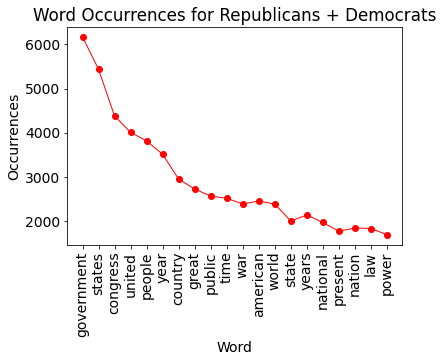

In [163]:
democrat_ind = []
repub_ind = []

# Loop through all the party data and note what indeces refer to democrats and republicans
for i, party_info in enumerate(VEC_PARTY):
    party, pres, year = party_info

    if party == 'd':
        democrat_ind.append(i)
    elif party == 'r':
        repub_ind.append(i)


# Now that we have what indeces refer to what parties we are worried about make dataframes
# Dataframe with both democratic and republican presidents, only considering the top 20 words
republican_democrat_dataframe = dataframe.iloc[democrat_ind+repub_ind, 0:20]
row_of_words = []
row_of_sums = []
for col_name, col_data in republican_democrat_dataframe.iteritems():
    row_of_words.append(col_name)
    row_of_sums.append(col_data.sum())

plt.rcParams.update({'font.size': 14})
plt.xlabel('Word')
plt.plot(row_of_words, row_of_sums, 'ro-', linewidth=1)
plt.title('Word Occurrences for Republicans + Democrats')
plt.ylabel('Occurrences')
plt.xlabel('Word')
plt.xticks(rotation=90)
plt.show()

##### Question 3Cv:
Create a plot showing the top 10 most frequently used words for Republicans and Democrats in a small multiple or faceted plot

C:\Users\itsla\AppData\Local\Temp\ipykernel_24512\4223867708.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels=row_of_words, rotation=90)


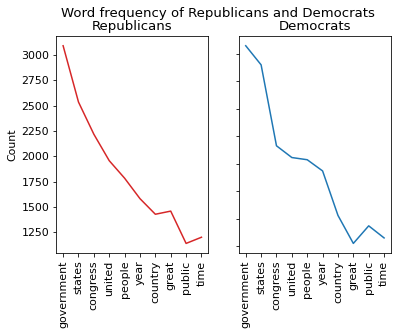

In [202]:
# Now consider only the top 10 and separate the parties
republican_dataframe_10 = dataframe.iloc[repub_ind, 0:10]
democrat_dataframe_10 = dataframe.iloc[democrat_ind, 0:10]

row_of_words = []
row_of_sums_repub = []
row_of_sums_demo = []
for col_name, col_data in republican_dataframe_10.iteritems():
    row_of_words.append(col_name)
    row_of_sums_repub.append(col_data.sum())

for col_name, col_data in democrat_dataframe_10.iteritems():
    row_of_sums_demo.append(col_data.sum())

plt.rcParams.update({'font.size': 11})
fig, (ax1, ax2) = plt.subplots(1, 2)
plt.xticks(rotation=90)
fig.suptitle('Word frequency of Republicans and Democrats')
ax1.plot(row_of_words, row_of_sums_repub, 'tab:red')
ax1.set_title('Republicans')
ax1.label_outer()
ax1.set(ylabel='Count')
ax1.set_xticklabels(labels=row_of_words, rotation=90)
ax2.set_title('Democrats')
ax2.label_outer()
ax2.plot(row_of_words, row_of_sums_demo, 'tab:blue')

### Question 4: Text Classification - Bonus
Repeat the analysis from above, but implement the Bernoulli Naive Bayes and Multinomial Naive Bayes models yourself. Follow the pseudocode given in the the IR book. Note,for this question you will not use the standard Na ̈ıve Bayes package, library or function.
This means you can’t use sklearn.naive bayes.BernoulliNB in Python
You can’t use sklearn.naive bayes.MultinomialNB in Python


#### Question 4A: 
For the 5 speeches listed above determine the party affiliations of
the president. Calculate and report P (C = Dems |X) and P (C = Reb |X) under the Bernoulli model of Na ̈ıve Bayes. In order to avoid underflow errors, use the log probabilities as discussed in class.

#### Question 4B: 
For the 5 speeches listed above determine the party affiliations of the
president. Calculate and report P (C = Dems |X) and P (C = Reb |X) under the Multinomial model of Na ̈ıve Bayes.

Hint: A strong suggestion for this question is to first create and test your code on a small document set, e.g., the example in the IR-book. Once you have that working correctly, then run on the SOTU addresses